### Dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

### Step by step cleaning data:
1. Import libaries
2. Dropping unnecessary columns
3. Handling missing values
4. Handling inconsistent data and string columns
5. Feature engineering
6. Outlier Removals

### 1. Import libaries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# It contains 13320 rows and 9 columns
df.shape

(13320, 9)

In [4]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### 2. Drop unnecessary columns

In [8]:
df1 = df.drop(['area_type','society','balcony','availability'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### 3. Handling missing values

In [9]:
# count number of Na value in columns
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# remove all missing values
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### 4. Handling inconsistent data and string columns

In [12]:
# checking all values of size
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
# get the number from string type
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-13-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df2[df2['bhk'] >=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# Check float number
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
# get all rows with string type
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [31]:
# convert '2100-2850' to number = (2100+2850)/2
def convert_sqrt_to_num(x):
    tokens =x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
df3 = df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(lambda x: convert_sqrt_to_num(x))
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### 5. Feature engineering

In [40]:
df4 = df3.copy()

# Add new column
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [42]:
len(df4.location.unique())

1304

In [43]:
df4.location = df4.location.apply(lambda x: x.strip()) # remove white spaces
location_stats = df4.location.value_counts()
location_stats

Whitefield          535
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      266
Thanisandra         236
                   ... 
Pillanna Gardens      1
Panathur Road,        1
RR Nagar              1
Huttanahalli          1
D Souza Layout        1
Name: location, Length: 1293, dtype: int64

In [44]:
len(location_stats[location_stats <=10])

1052

In [45]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

BTM 1st Stage           10
Nagappa Reddy Layout    10
Nagadevanahalli         10
Sadashiva Nagar         10
Dodsworth Layout        10
                        ..
Pillanna Gardens         1
Panathur Road,           1
RR Nagar                 1
Huttanahalli             1
D Souza Layout           1
Name: location, Length: 1052, dtype: int64

In [47]:
len(df4.location.unique())

1293

In [48]:
# convert location that has less than 10 apartments to other
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

### 6. Outlier Removal

In [113]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [50]:
# 300 square foot per bedroom is a typical threshold
df4[df4.total_sqft/df4.bhk <300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [53]:
# remove outliers with >= 300 square foot per bedroom
df5 = df4[~(df4.total_sqft/df4.bhk <300)]
len(df5)

12502

In [54]:
# check basic statistics
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [83]:
# Remove price per sqft 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df5.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out

In [84]:
df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

In [71]:
df6.location.nunique()

242

In [91]:
def plot_scatter_chart(df, loc):
    bhk2 = df[(df.location == loc) & (df.bhk ==2)]
    bhk3 = df[(df.location == loc) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 bedrooms', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker = '+', color = 'green', label = '3 bedrooms', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(loc)
    plt.legend()

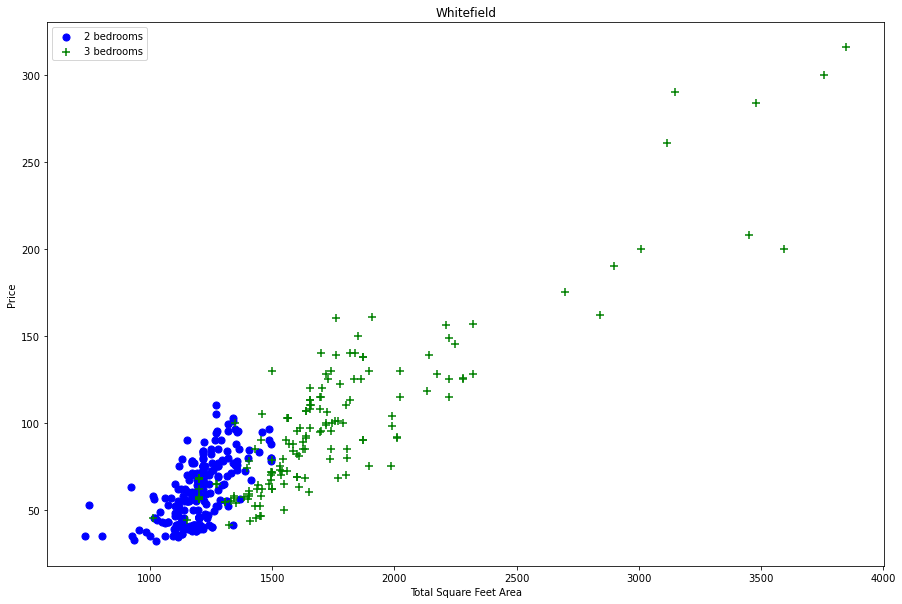

In [92]:
plot_scatter_chart(df6, "Whitefield")

We should remove properties where for the same location, the price of 3-bedroom apartment is less than 2-bedroom apartment

In [96]:
# remove for the same location, the price of 3-bedroom apartment is less than 2-bedroom apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stas = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stas[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stas.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [97]:
df7 = remove_bhk_outliers(df6)

In [99]:
df7.shape

(7329, 7)

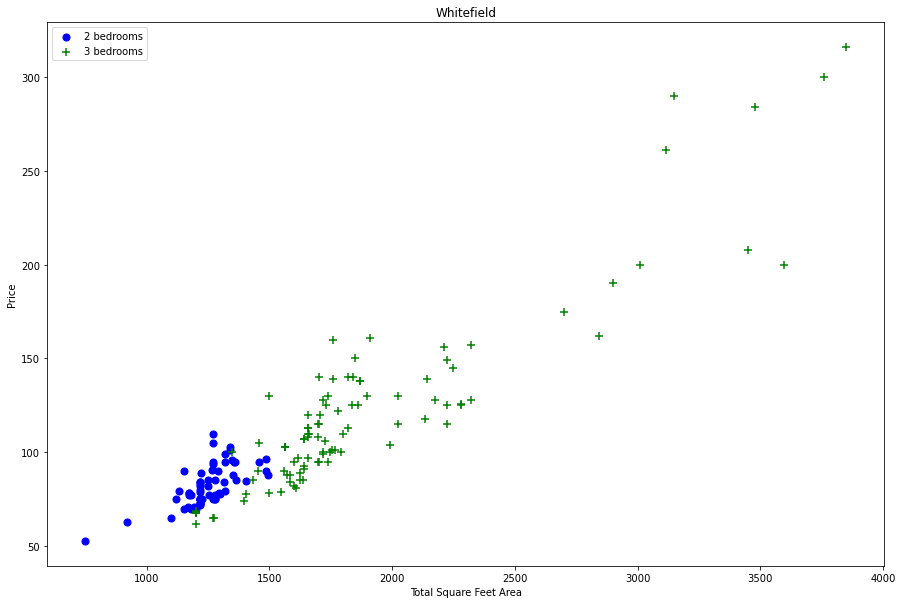

In [100]:
plot_scatter_chart(df7, "Whitefield")

Text(0, 0.5, 'Count')

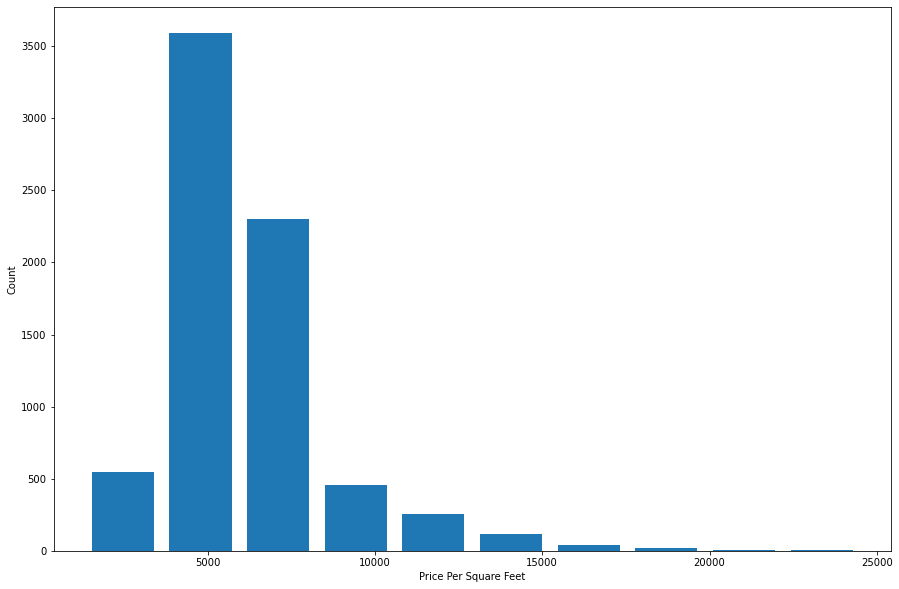

In [101]:
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

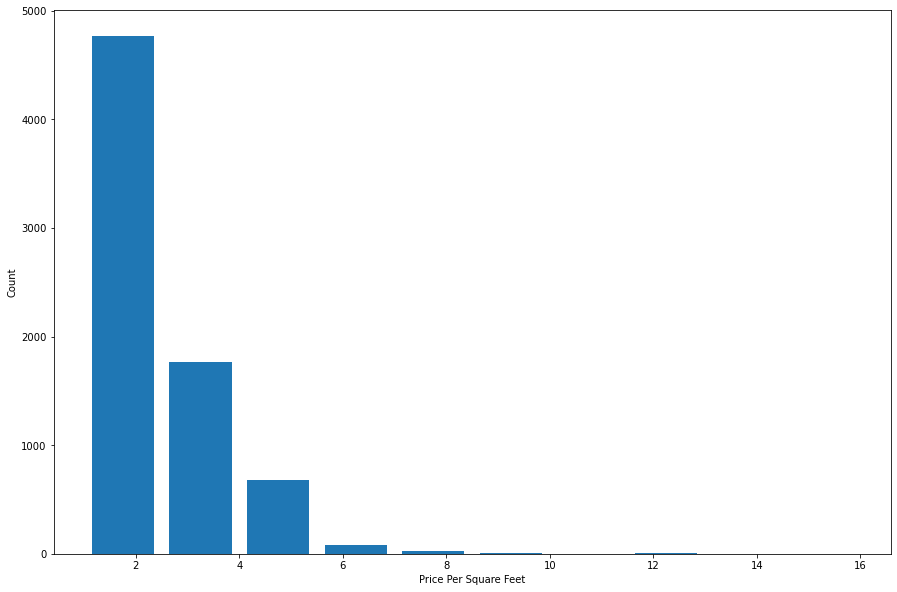

In [102]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [111]:
# Remove outliers with numbers of bathroom > numbers of bedroom + 2
df8 = df7[~(df7.bath > df7.bhk+2)]
df8.shape

(7325, 7)

In [108]:
df9 = df8.drop(['size','price_per_sqft'], axis = 'columns')

In [110]:
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [112]:
df9.to_csv("Bengaluru_House_Data_Cleaned", header = True, index = False)